In [1]:
#Importing The Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split

# Data Exploration

In [2]:
# Reading the CSV file as DataFrame
df = pd.read_csv("C:/Users/veera/Desktop/HousingData.csv")

In [3]:
#Displaying The Dataframe
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
# Number of Columns in Data
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [5]:
# Rows and Columns in dataframe
print("Number of samples in data : ",df.shape[0])
print("Number of features in data : ",df.shape[1])

Number of samples in data :  506
Number of features in data :  14


In [6]:
#Information about the data
df.info()
#-->From Info we can see some data is missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


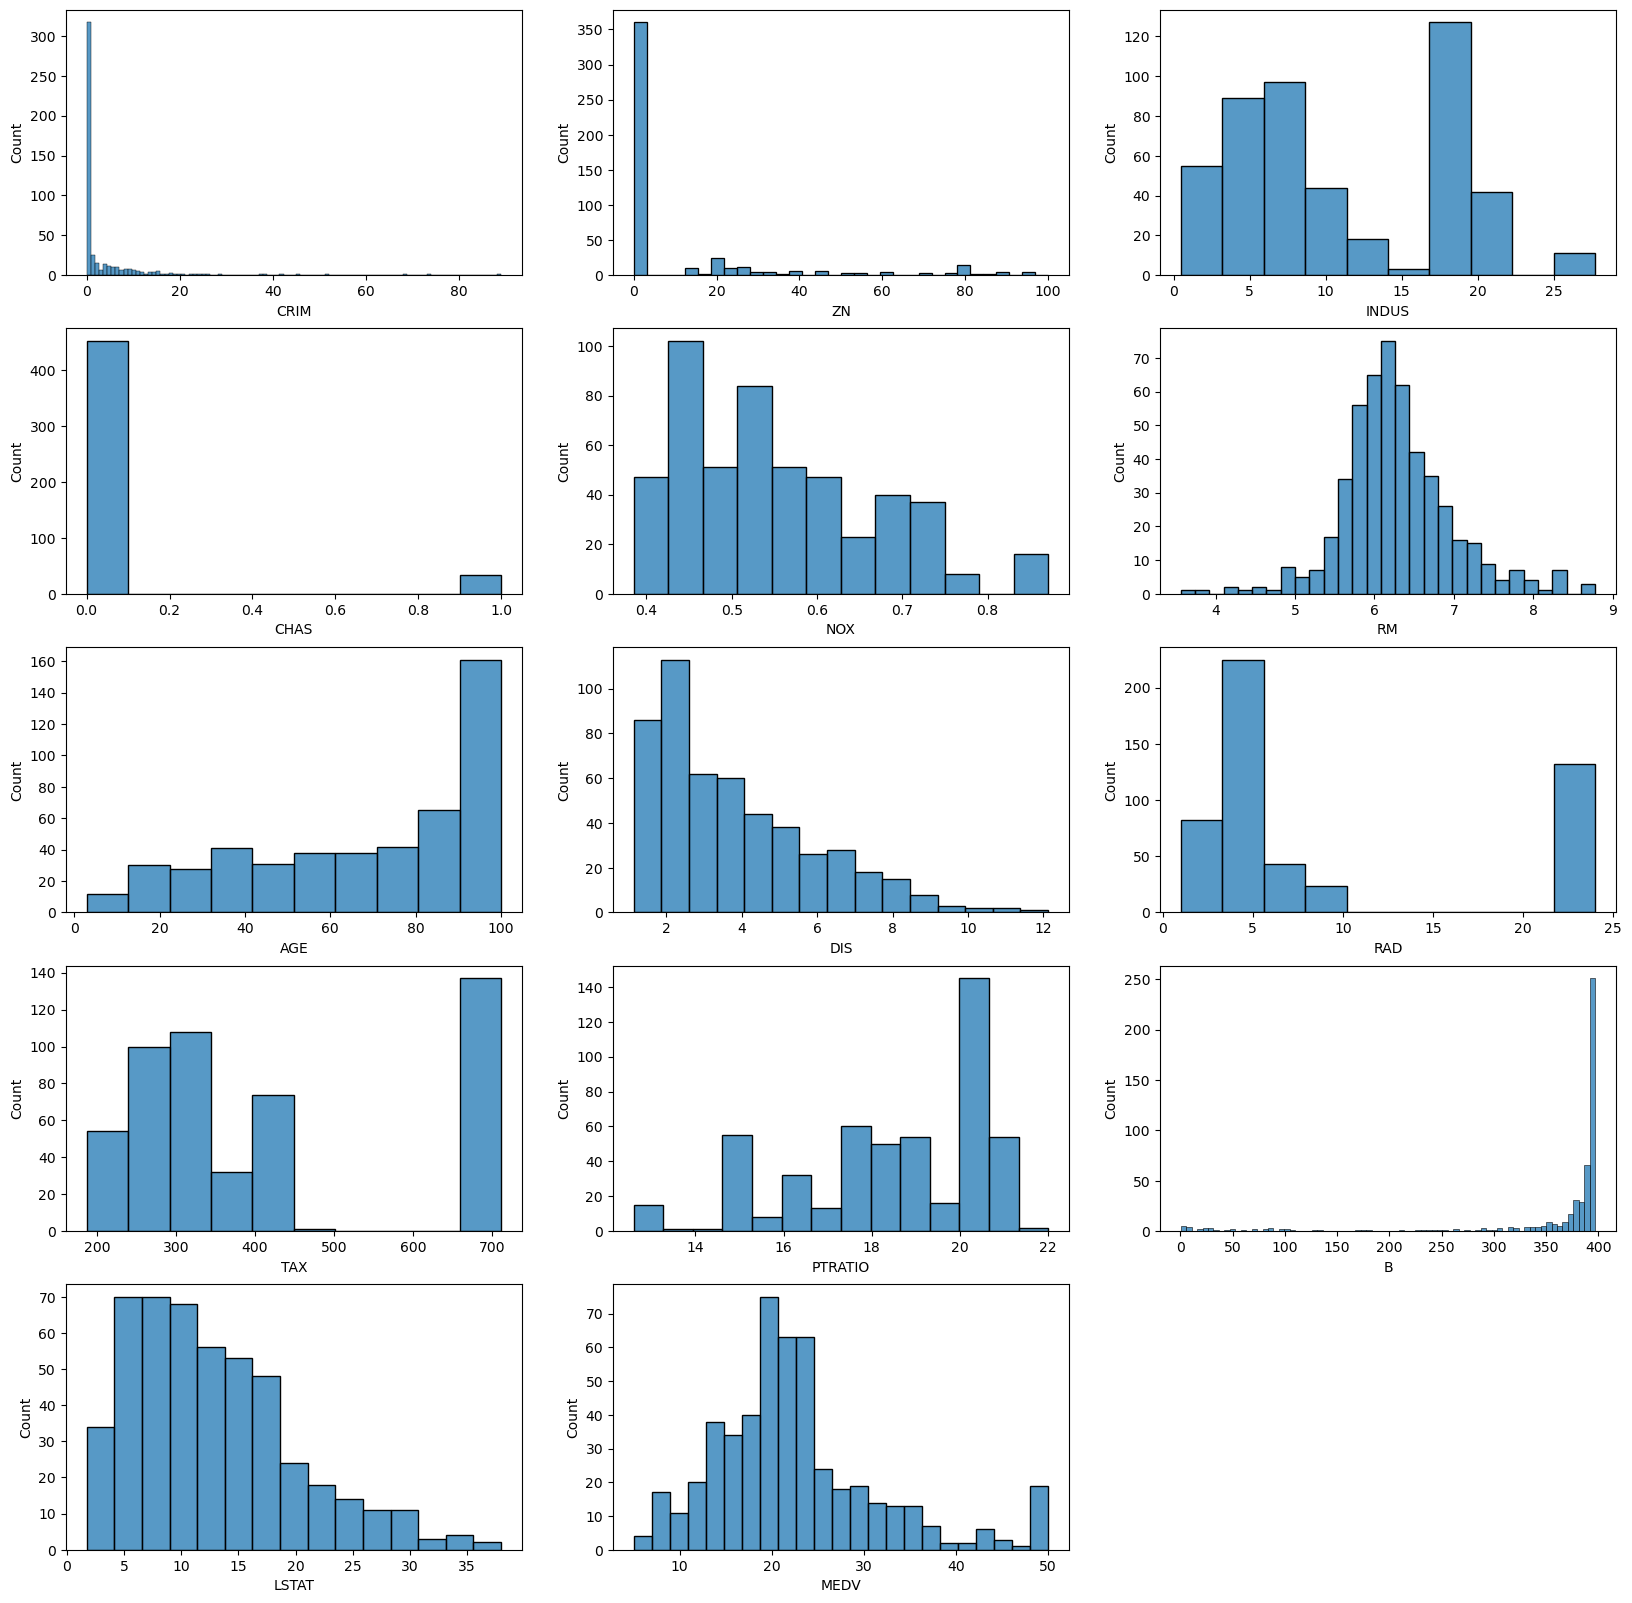

In [7]:
fig, axes = plt.subplots(5,3, figsize=(20,20))

for ax in axes.flatten():
    ax.set_axis_off()

for col, ax in zip(df.columns, axes.flatten()):
    ax.set_axis_on()
    sns.histplot(data=df, x=col, ax=ax)

<AxesSubplot:>

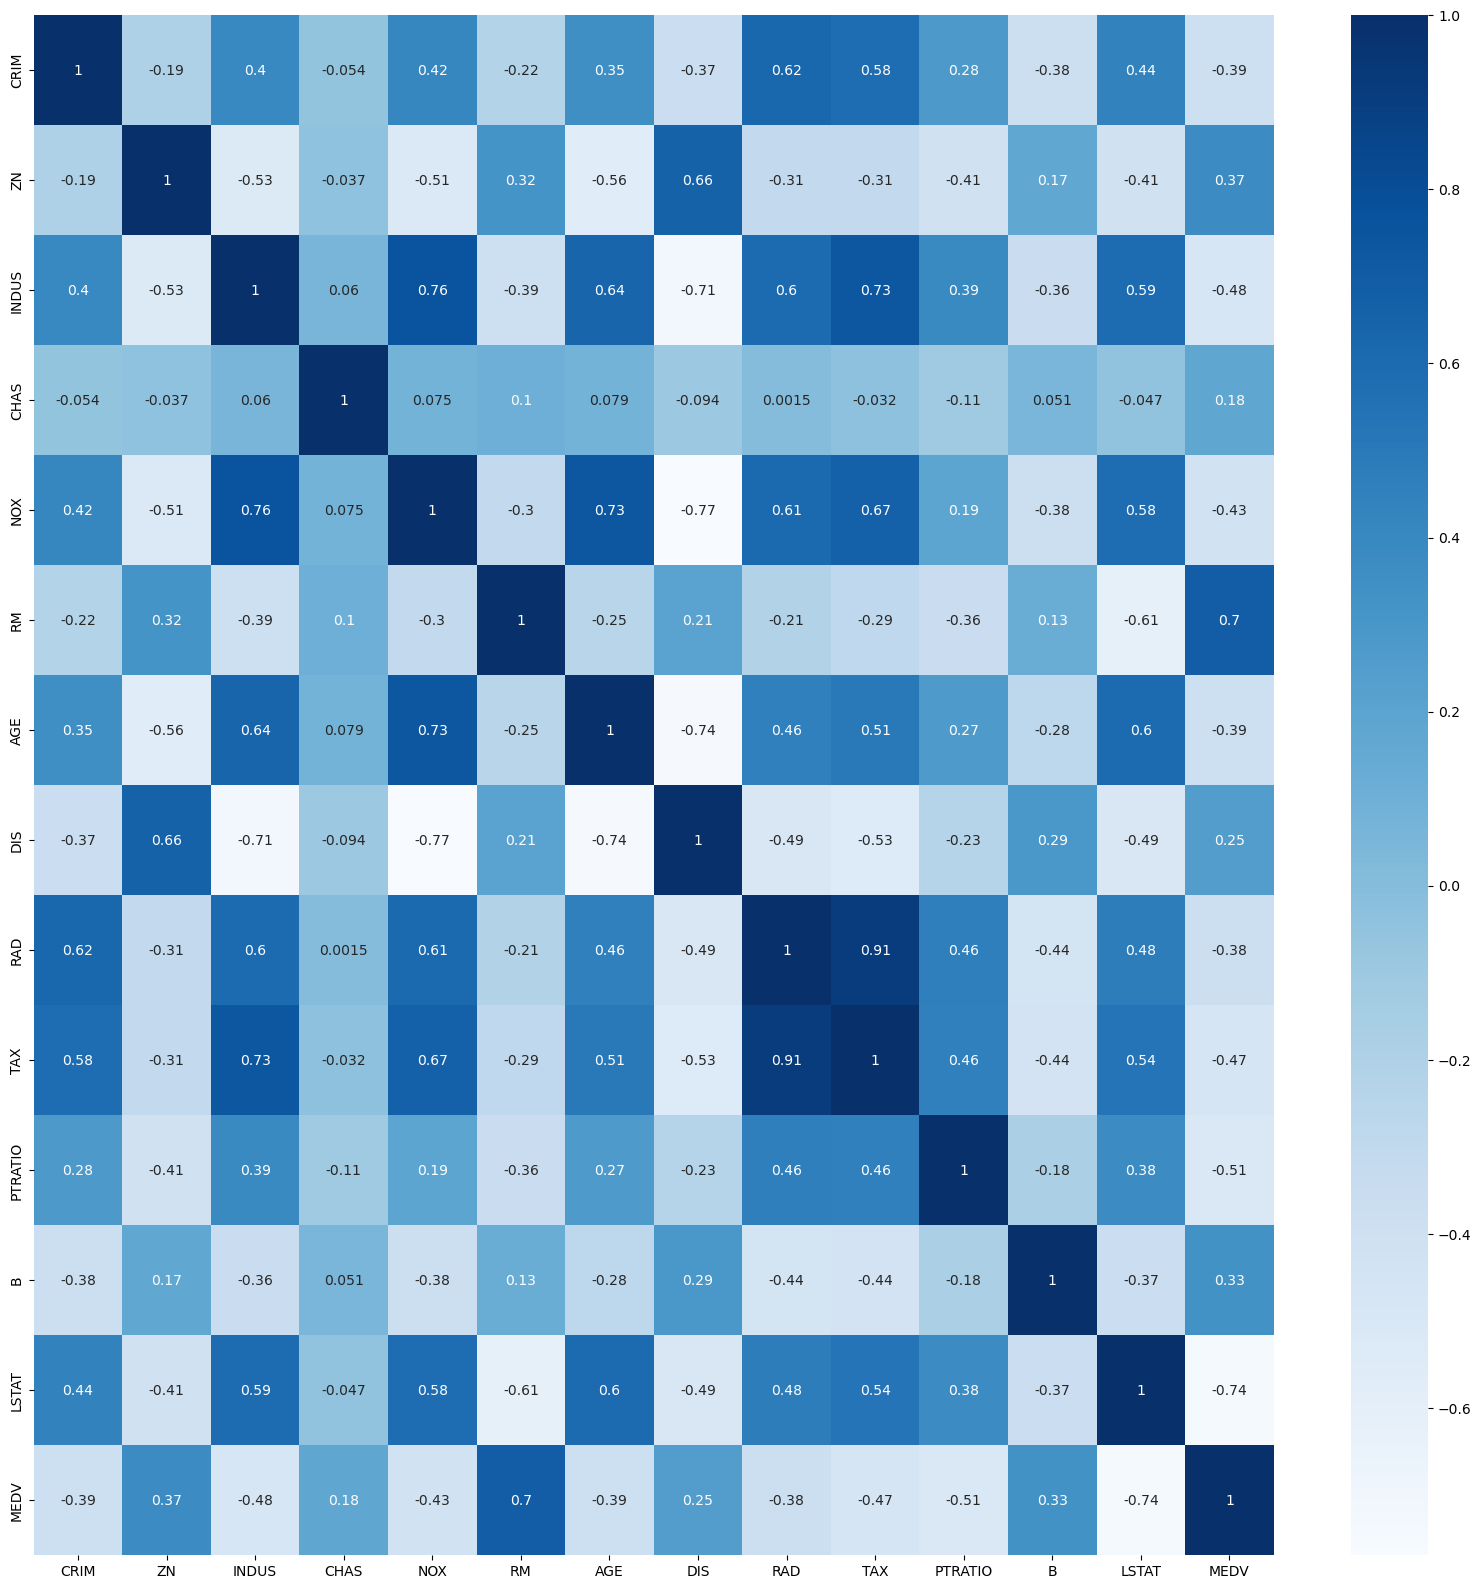

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [9]:
#Number of missing data values from dataframe from each feature
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

# Data Preprocessing

In [10]:
# We will impute the missing data with median
for i in range(0,len(df.columns)):
    df[df.columns[i]].fillna(df[df.columns[i]].mean(),inplace=True)

In [11]:
# After imputation there are no null values in the data
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [12]:
#Again displaying the data
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


In [13]:
y= df['MEDV']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [14]:
X= df.drop('MEDV',axis=1)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000


In [15]:
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X,y ,random_state=104,
                          train_size=0.8,shuffle=True)

In [16]:
X_train.shape

(404, 13)

In [17]:
X_test.shape

(102, 13)

In [18]:
# Now we have to do scaling of data as there is different ranges of data present in different features
# Feature scaling is one of the most important data preprocessing step in machine learning. 
# Algorithms that use the distance between the features are biased towards numerically larger values if the data is not scaled.
from sklearn.preprocessing import StandardScaler
# compute required values
scaler = StandardScaler()
model = scaler.fit(X_train)
scaled_X_train = model.transform(X_train)
# print scaled data
print(scaled_X_train)

[[-0.30149534 -0.4996133  -0.41803948 ...  1.20119361  0.41387512
   1.01625061]
 [ 0.31967009 -0.4996133   1.06691274 ...  0.82922295 -2.92182545
  -0.09366123]
 [ 0.18861965 -0.4996133   1.06691274 ...  0.82922295  0.23212617
   0.85789376]
 ...
 [-0.40605105 -0.4996133   0.43923715 ... -0.93763767  0.39408068
  -0.42451393]
 [-0.41154583  2.09456242 -1.19480666 ... -1.30960833  0.40071631
  -1.08339152]
 [-0.39944387  0.04083997 -0.72665907 ...  0.22477064  0.44041766
  -0.55176496]]


In [19]:
# Scaling testing set also
scaled_X_test = scaler.fit(X_test).fit_transform(X_test)

In [20]:
scaled_X_test

array([[-0.3190349 , -0.44964299,  1.20235331, ..., -1.7745074 ,
        -0.09201105, -0.1019527 ],
       [-0.39818556,  0.46320347, -1.16111692, ..., -2.54607105,
         0.36047162, -0.82368148],
       [-0.39502466, -0.44964299,  1.55210451, ...,  1.17558891,
         0.42369275,  0.616806  ],
       ...,
       [-0.44127181, -0.44964299, -0.46615675, ...,  1.03943061,
         0.42168573,  0.0940724 ],
       [-0.4457847 , -0.44964299, -0.29506633, ...,  0.26786696,
         0.43473136,  0.34058881],
       [-0.45339971, -0.44964299, -1.32463696, ..., -0.2767662 ,
         0.44607102, -1.27661826]])

# MODEL BUILDING

# 

# 1-SVR

In [21]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(scaled_X_train, y_train)

SVR()

In [22]:
#predictions
y_pred = regressor.predict(scaled_X_test)

In [23]:
y_pred

array([19.77405211, 33.58352245, 17.99015839, 28.1054705 , 19.28598152,
       31.53096751, 24.35951721, 23.59049664, 21.69807665, 24.79013803,
       16.09997439, 21.42717668, 23.08143644, 19.07367935, 21.35307642,
       21.13959226, 20.86411891, 17.06176697, 27.48191186, 16.88834907,
       33.91114098, 18.26070655, 26.80836847, 19.62870736, 25.40138817,
       23.90281888, 20.54832745, 25.58588654, 16.97786186, 29.75357378,
       22.94424565, 16.57235391, 28.84315444, 22.26649024, 16.7511024 ,
       20.33841891, 25.25362387, 30.24837404, 16.10868582, 24.36191335,
       23.84128133, 30.64564671, 19.84585502, 19.57440964, 15.85463561,
       32.33256241, 18.10721141, 24.4427489 , 27.17717402, 29.09262525,
       11.49315759, 12.51048871, 25.01710554, 23.76884519, 16.44498297,
       26.08533072, 31.526179  , 14.71382524, 18.54169338, 20.70879013,
       15.98047038, 25.4875233 , 26.73655921, 23.0303838 , 11.21520991,
       17.04258107, 22.35204477, 11.95745591, 19.32592109, 22.07

In [24]:
# Actual values
y_test

152    15.3
261    43.1
135    18.1
41     26.6
109    19.4
       ... 
115    18.3
161    50.0
103    19.3
499    17.5
97     38.7
Name: MEDV, Length: 102, dtype: float64

In [25]:
# Comparision between actual value and predictions, since it is classification problem we have to use errors for accuracy
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(y_test, y_pred)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 3.69


In [26]:
from sklearn.metrics import mean_squared_error
import numpy as np
score = np.sqrt(mean_absolute_error(y_test, y_pred))
print("The Root Mean Squared Error of our Model is {}".format(round(score, 2)))

The Root Mean Squared Error of our Model is 1.92


In [27]:
from sklearn.metrics import r2_score
print("Accuracy is : ",r2_score(y_test, y_pred)*100)

Accuracy is :  53.60636742855242


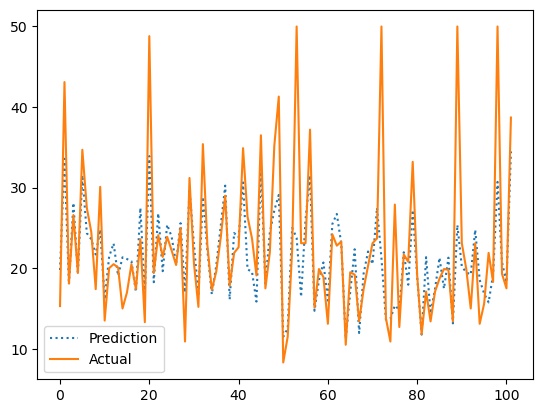

In [28]:
plt.plot(np.arange(len(y_pred)), y_pred, linestyle = 'dotted', label='Prediction')
plt.plot(np.arange(len(y_pred)), y_test, label='Actual')

plt.legend()
plt.show()

#From The plot we can see that SVR is working accurately as,there is a lot of similarity between actual and prediction values

<AxesSubplot:>

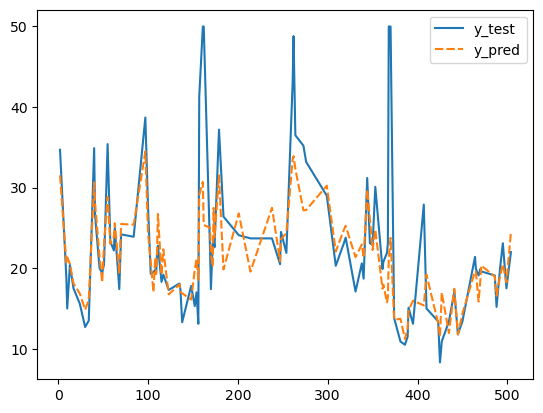

In [29]:
preds = pd.DataFrame({
    'y_test':y_test,
    'y_pred':y_pred
})
# preds['MA_pred'] = preds['y_pred'].rolling(window=100).mean()

sns.lineplot(data=preds)
#From The plot we can see that SVR is working accurately as there is a lot of similarity between actual and prediction values

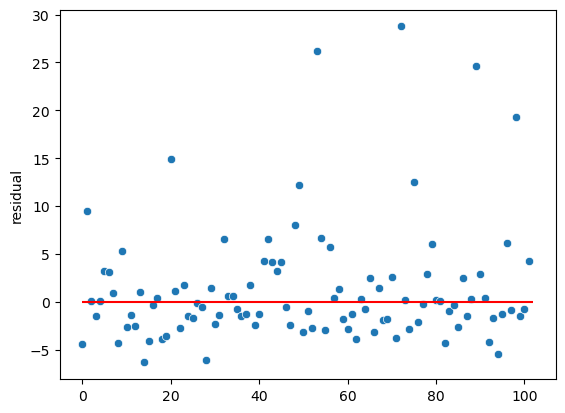

In [30]:
preds['residual'] = preds['y_test'] - preds['y_pred']

sns.scatterplot(data=preds, y='residual', x=np.arange(len(preds['y_pred'])))
plt.hlines(y=0, xmin=0, xmax=len(preds['y_pred']), color='red')

#This is another plot from where we can see whether the model is working perfectly or not , 
# The scattered points are  close to the line ,i.e, they are not spread apart which says SVM has worked accurately
# There is not so much of error between the Actual and Predicted Values

# 2-Decision Tree

In [31]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor1 = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor1.fit(scaled_X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [32]:
#Predictions
y_pred1 = regressor1.predict(scaled_X_test)

In [33]:
y_pred1

array([23.8, 43.5, 24.4, 29.6, 27.1, 32.7, 22.4, 22. , 22.5, 29.1, 14.8,
       22. , 22. , 21.8, 27.1, 15.6, 22. , 24.4, 21.6, 21.4, 21.9, 18.9,
       22. , 20. , 22. , 23.9, 20.4, 22. , 11.7, 32. , 28.7, 13.6, 32.7,
       22. , 20.5, 19.6, 21.6, 32.2, 13.6, 23.5, 23.2, 32.9, 11.9, 21.7,
       11.7, 31.7, 16.6, 28.4, 45.4, 23.9, 12. ,  9.5, 18.4, 17.8, 20.8,
       24.5, 33.1, 13.5, 16.7, 27.1, 11.7, 21.6, 29.9, 25. ,  8.3, 21.4,
       21.2, 10.8, 19.4, 18.9, 21.7, 24.8, 27.5, 13.8, 13.8, 20.8, 13.1,
       20. , 22.8, 32.7, 23.2,  7. , 18.7, 27.5, 20.2, 21.1, 21.7, 22.4,
       17.2, 50. , 18.9, 20.6, 20.8, 19.2, 16.4, 17.1, 24.5, 20. , 42.3,
       20.1, 18.8, 50. ])

In [34]:
# Comparision between actual value and predictions, since it is classification problem we have to use errors for accuracy
score1 = mean_absolute_error(y_test, y_pred1)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 1.92


In [35]:
score = np.sqrt(mean_absolute_error(y_test, y_pred1))
print("The Root Mean Squared Error of our Model is {}".format(round(score, 2)))

The Root Mean Squared Error of our Model is 2.04


In [36]:
from sklearn.metrics import r2_score
print("Accuracy is : ",r2_score(y_test, y_pred1)*100)

Accuracy is :  47.32743300424175


<AxesSubplot:>

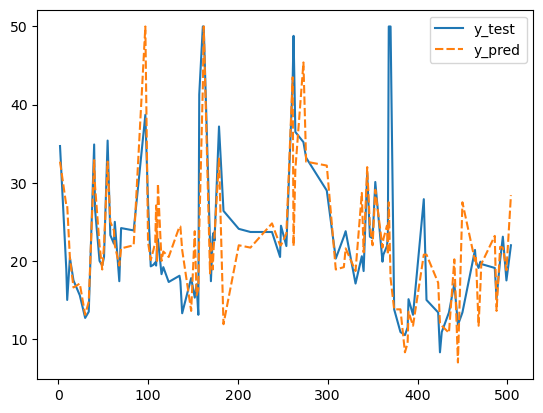

In [37]:
preds = pd.DataFrame({
    'y_test':y_test,
    'y_pred':y_pred1
})
# preds['MA_pred'] = preds['y_pred'].rolling(window=100).mean()

sns.lineplot(data=preds)


#From The plot we can see that Decision tree is not working accurately
#                                            as there is lot of differnce between actual and prediction values

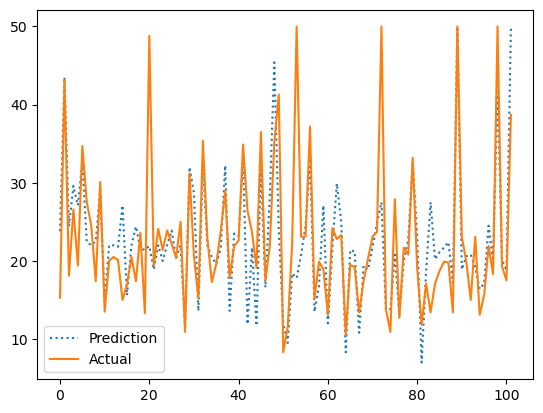

In [38]:
plt.plot(np.arange(len(y_pred1)), y_pred1, linestyle = 'dotted', label='Prediction')
plt.plot(np.arange(len(y_pred1)), y_test, label='Actual')

plt.legend()
plt.show()

#From The plot we can see that Decision tree is working accurately as,
#                                     there is a lot of similarity between actual and prediction values

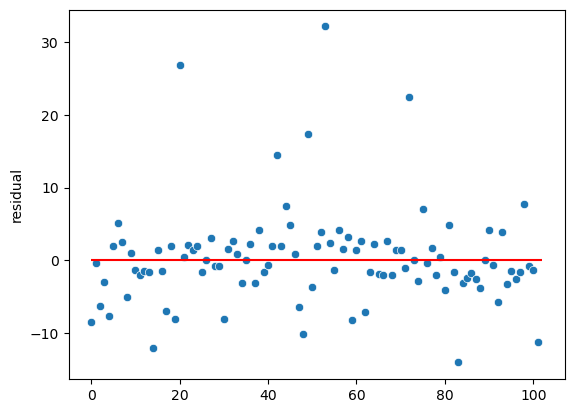

In [39]:
preds['residual'] = preds['y_test'] - preds['y_pred']

sns.scatterplot(data=preds, y='residual', x=np.arange(len(preds['y_pred'])))
plt.hlines(y=0, xmin=0, xmax=len(preds['y_pred']), color='red')

#This is another plot from where we can see whether the model is working perfectly or not , 
# The scattered points are very close to the line except to some outliers
# they are  spread apart which says decision tree has not worked accurately
# There is so much of error between the Actual and Predicted Values